# 데이터 셋 분석

In [5]:
# sys.path를 수정하여 모듈 경로를 설정
import sys
import os
import pandas as pd
from matplotlib import rc  ### 이 줄과

import module
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.dates import DateFormatter

import warnings

# 프로젝트 루트 경로 추가
project_root = os.path.abspath("..")
sys.path.append(project_root)
import numpy as np


rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 


warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# 모든 행 출력 설정
pd.set_option('display.max_rows', None)



In [36]:
df = module.file_load.load_origin_train()
df_test = module.file_load.load_origin_test()
module.preprocess.시_군_구_add(df)
module.preprocess.시_군_구_add(df_test)


In [37]:
# 칼럼 이름을 쉽게 바꿔주겠습니다. 다른 칼럼도 사용에 따라 바꿔주셔도 됩니다!
df = df.rename(columns={'전용면적(㎡)':'전용면적'})
# 칼럼 이름을 쉽게 바꿔주겠습니다. 다른 칼럼도 사용에 따라 바꿔주셔도 됩니다!
df_test = df_test.rename(columns={'전용면적(㎡)':'전용면적'})

In [38]:
df['is_test'] = 0
df_test['is_test'] = 1
concat = pd.concat([df, df_test])

In [8]:
df.shape, df_test.shape

((1118822, 52), (9272, 51))

In [9]:
df_test.columns

Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층', '건축년도',
       '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)',
       'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형',
       'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', 'k-홈페이지',
       'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태',
       '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드',
       '좌표X', '좌표Y', '단지신청일'],
      dtype='object')

# 결측치 비율

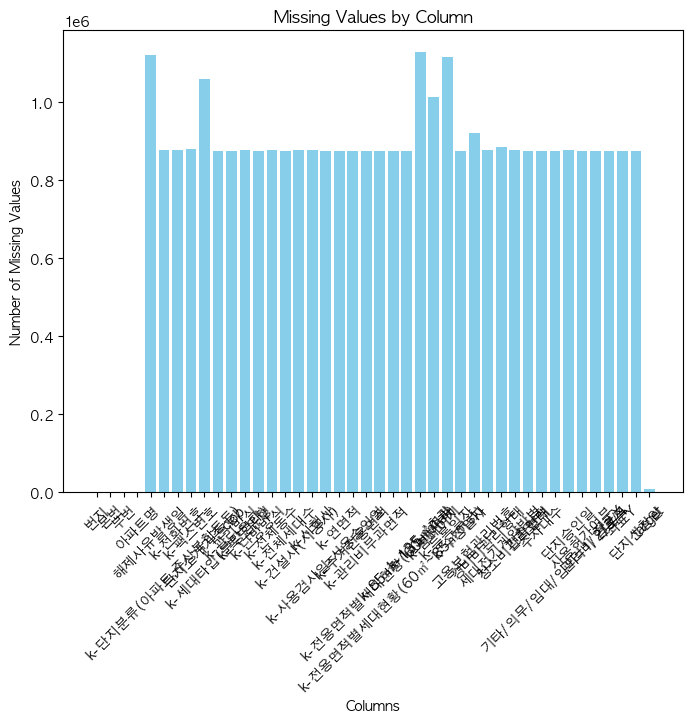

In [17]:
# 결측치 개수 계산
missing_data = concat.isnull().sum()

# 결측치가 0인 열은 제외
missing_data = missing_data[missing_data > 0]

# 막대그래프 그리기
plt.figure(figsize=(8, 6))
plt.bar(missing_data.index, missing_data.values, color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values by Column')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()

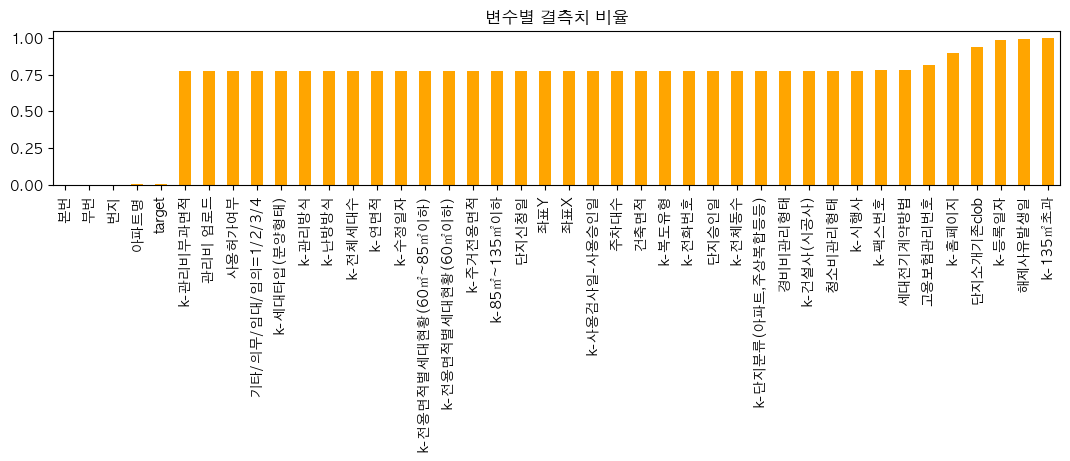

In [11]:
# 변수별 결측치의 비율을 plot으로 그려보면 아래와 같습니다.
fig = plt.figure(figsize=(13, 2))
missing = concat.isnull().sum() / concat.shape[0]
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color='orange')
plt.title('변수별 결측치 비율')
plt.show()

# 테스트 데이터 분석

In [19]:
df_test['계약년월'].value_counts()

계약년월
202308    3864
202307    3695
202309    1713
Name: count, dtype: int64

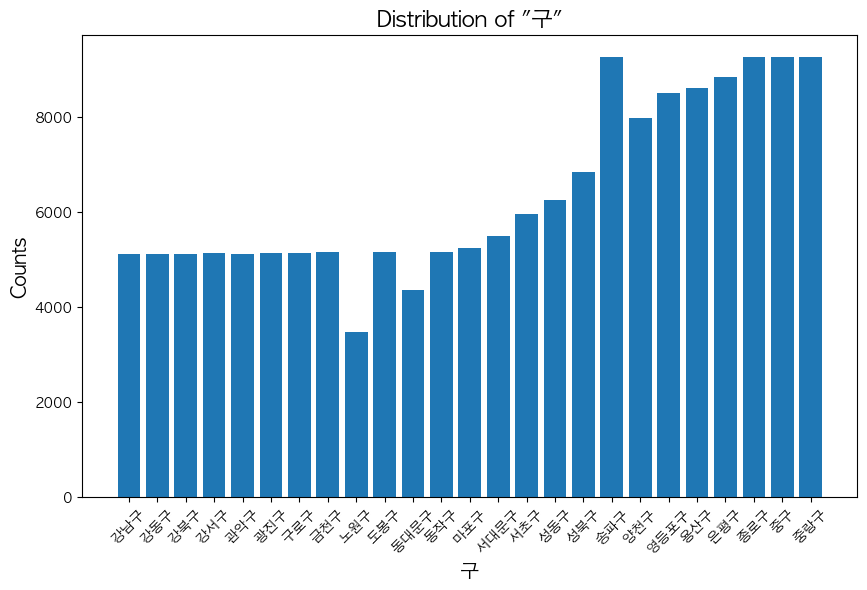

In [27]:
# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(df_test['구'].values, df_test['구'].index)
plt.title('Distribution of "구"', fontsize=16)
plt.xlabel('구', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()

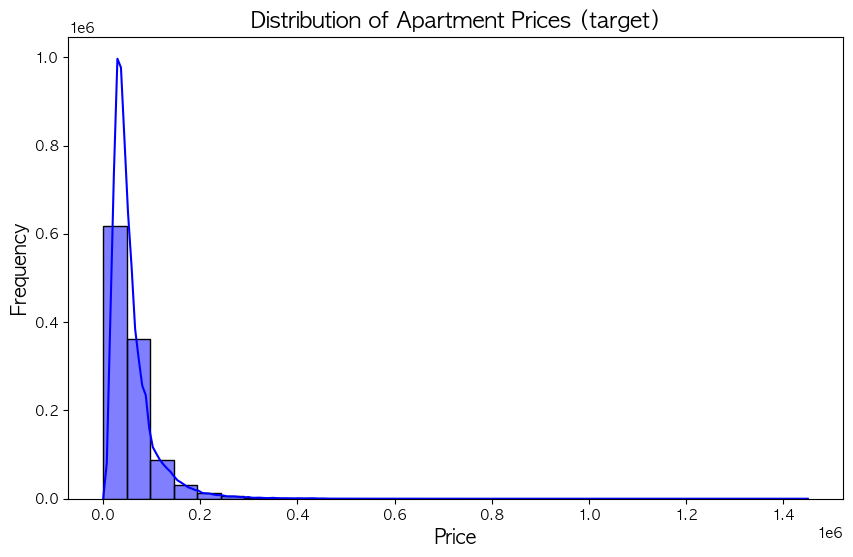

In [29]:

plt.figure(figsize=(10, 6))
sns.histplot(df['target'], kde=True, bins=30, color='blue')
plt.title('Distribution of Apartment Prices (target)', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

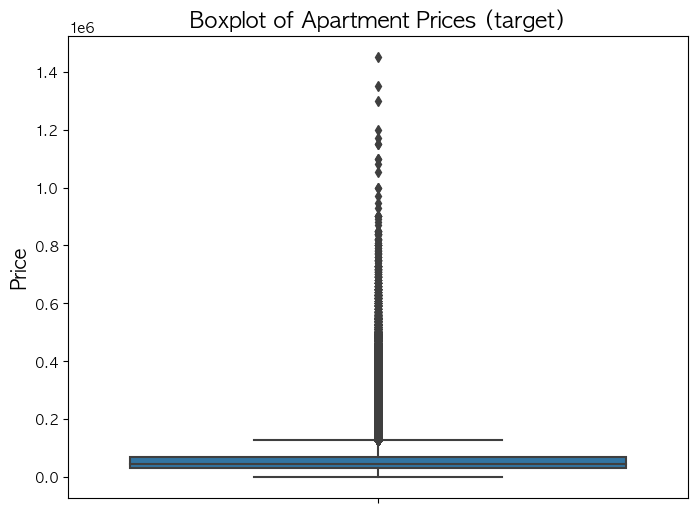

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['target'])
plt.title('Boxplot of Apartment Prices (target)', fontsize=16)
plt.ylabel('Price', fontsize=14)
plt.show()

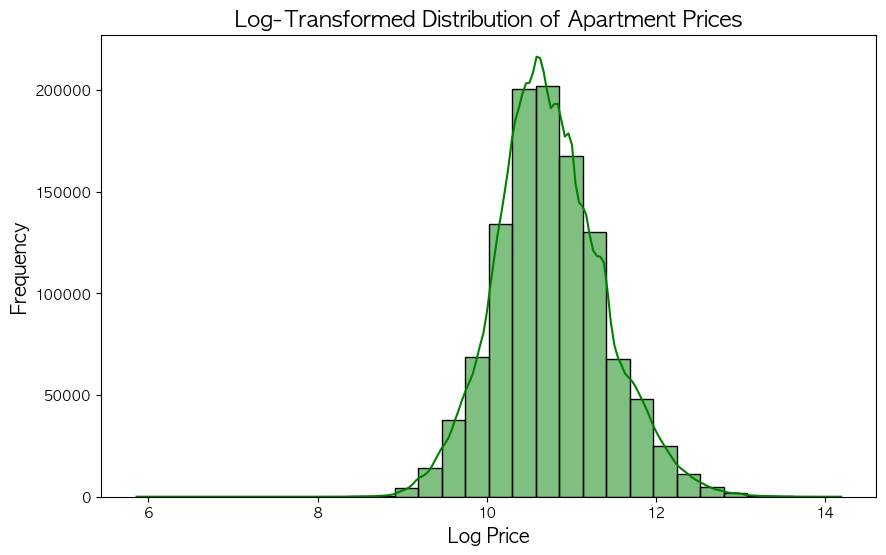

In [31]:

df['Log_Target'] = np.log1p(df['target'])  # log(1 + x) 변환

# 로그 변환된 값 시각화
plt.figure(figsize=(10, 6))
sns.histplot(df['Log_Target'], kde=True, bins=30, color='green')
plt.title('Log-Transformed Distribution of Apartment Prices', fontsize=16)
plt.xlabel('Log Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

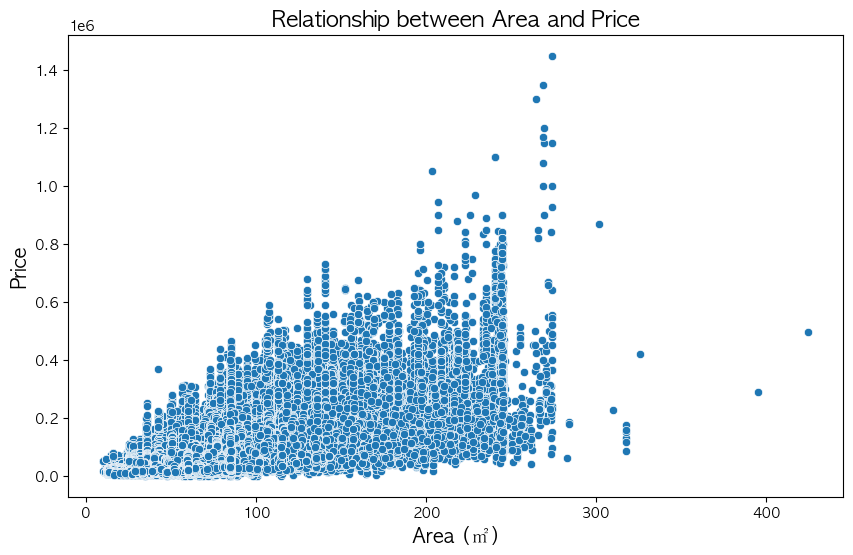

In [33]:
# 예: 면적과 Target의 관계
plt.figure(figsize=(10, 6))
sns.scatterplot(x='전용면적', y='target', data=df)
plt.title('Relationship between Area and Price', fontsize=16)
plt.xlabel('Area (㎡)', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

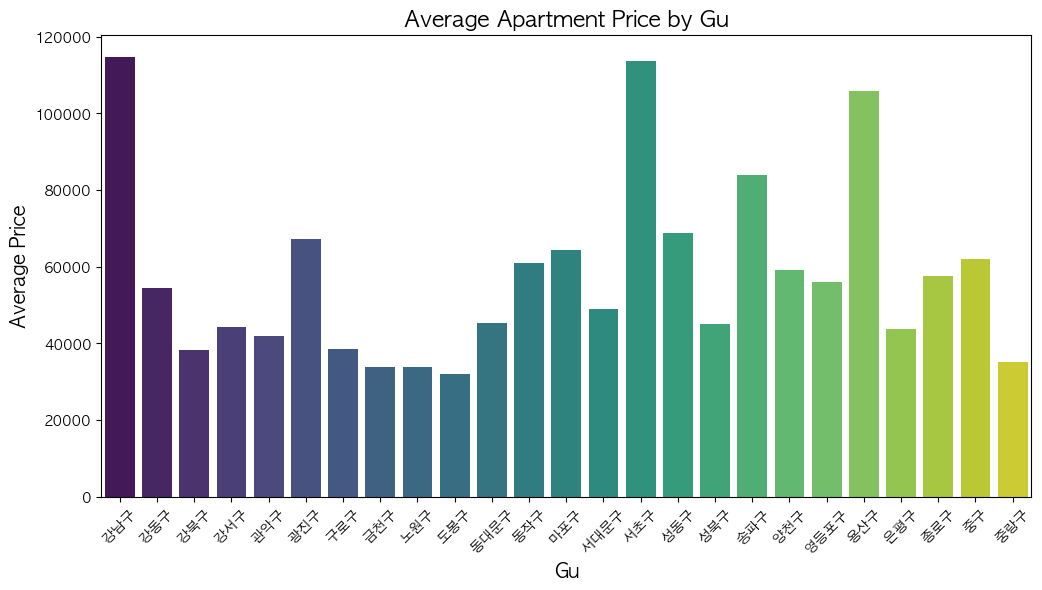

In [39]:

plt.figure(figsize=(12, 6))
sns.barplot(x='구', y='target', data=df, estimator=np.mean, ci=None, palette='viridis')
plt.title('Average Apartment Price by Gu', fontsize=16)
plt.xlabel('Gu', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.xticks(rotation=45)
plt.show()

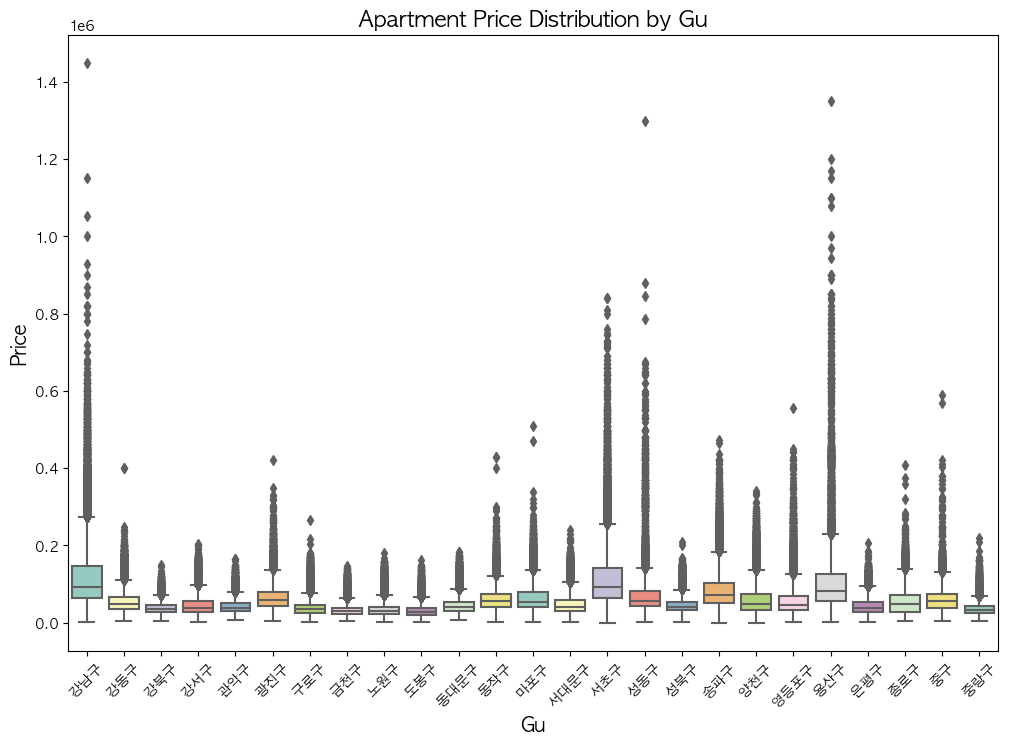

In [41]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='구', y='target', data=df, palette='Set3')
plt.title('Apartment Price Distribution by Gu', fontsize=16)
plt.xlabel('Gu', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)
plt.show()